In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from datetime import datetime as dt
import calendar as cal

init_notebook_mode(connected=True)
cf.go_offline()

from IPython.core.display import HTML
%matplotlib inline

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
df = pd.read_csv('train.csv', low_memory=False)

In [3]:
df_test = pd.read_csv('test.csv', low_memory=False)

In [4]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [5]:
df.head(4).transpose()

0                    1                    2  \
datetime    2011-01-01 00:00:00  2011-01-01 01:00:00  2011-01-01 02:00:00   
season                        1                    1                    1   
holiday                       0                    0                    0   
workingday                    0                    0                    0   
weather                       1                    1                    1   
temp                       9.84                 9.02                 9.02   
atemp                    14.395               13.635               13.635   
humidity                     81                   80                   80   
windspeed                     0                    0                    0   
casual                        3                    8                    5   
registered                   13                   32                   27   
count                        16                   40                   32   

                              3  
datetime    2011-01-01 03:00:00  
season                        1  
holiday                       0  
workingday                    0  
weather                       1  
temp                       9.84  
atemp                    14.395  
humidity                     75  
windspeed                     0  
casual                        3  
registered                   10  
count                        13

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
datetime            10886 non-null datetime64[ns]
season              10886 non-null int64
holiday             10886 non-null int64
workingday          10886 non-null int64
weather             10886 non-null int64
temp                10886 non-null float64
atemp               10886 non-null float64
humidity            10886 non-null int64
windspeed           10886 non-null float64
casual              10886 non-null int64
registered          10886 non-null int64
count               10886 non-null int64
month               10886 non-null int64
quarter             10886 non-null int64
weekNumberInYear    10886 non-null int64
dayOfMonth          10886 non-null int64
dayInWeek           10886 non-null object
hourOfDay           10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(13), object(1)
memory usage: 1.5+ MB


In [6]:
df.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

In [7]:
df_test.count()

datetime      6493
season        6493
holiday       6493
workingday    6493
weather       6493
temp          6493
atemp         6493
humidity      6493
windspeed     6493
dtype: int64

In [8]:
df.corr()

season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610  -0.147121  0.096758    0.164011  0.163439  
holiday     0.001929   0.008409  0.043799   -0.020956 -0.005393  
workingday -0.010880   0.013373 -0.319111    0.119460  0.011594  
weather     0.406244   0.007261 -0.135918   -0.109340 -0.128655  
temp       -0.064949  -0.017852  0.467097    0.318571  0.394454  
atemp      -0.043536  -0.057473  0.462067    0.314635  0.389784  
humidity    1.000000  -0.318607 -0.348187   -0.265458 -0.317371  
windspeed  -0.318607   1.000000  0.092276    0.091052  0.101369  
casual     -0.348187   0.092276  1.000000    0.497250  0.690414  
registered -0.265458   0.091052  0.497250    1.000000  0.970948  
count      -0.317371   0.101369  0.690414    0.970948  1.000000

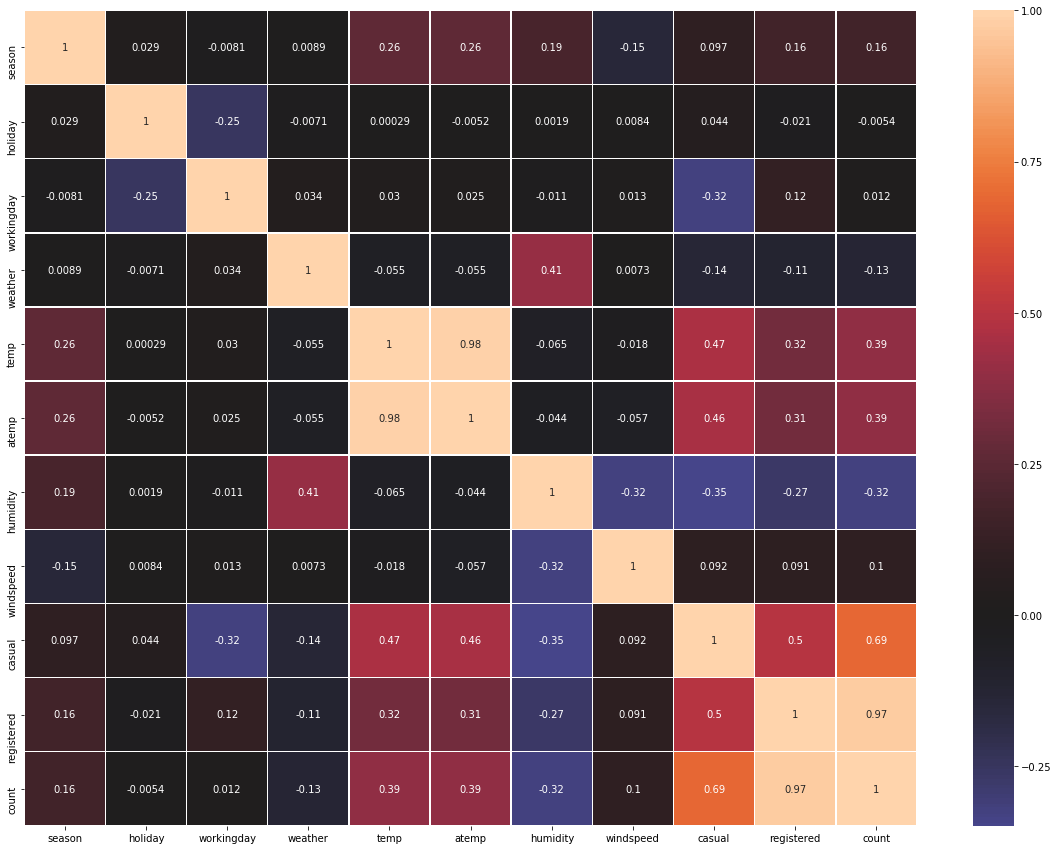

In [9]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, center=0)

In [10]:
cols = list(df.columns)

for col in cols :
    df[col].iplot(kind='hist',xTitle=col,yTitle='Counts')

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



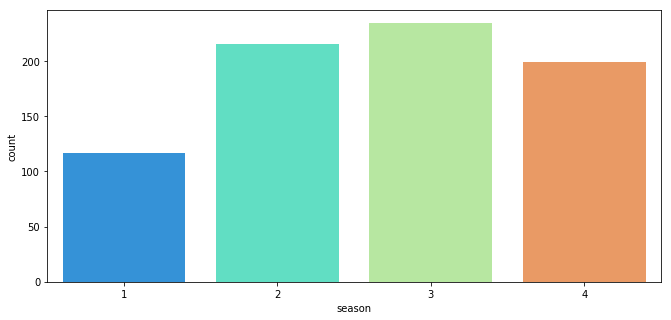

In [11]:
plt.figure(figsize=(11,5))
sns.barplot('season', 'count',data=df,palette='rainbow', ci=None)

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



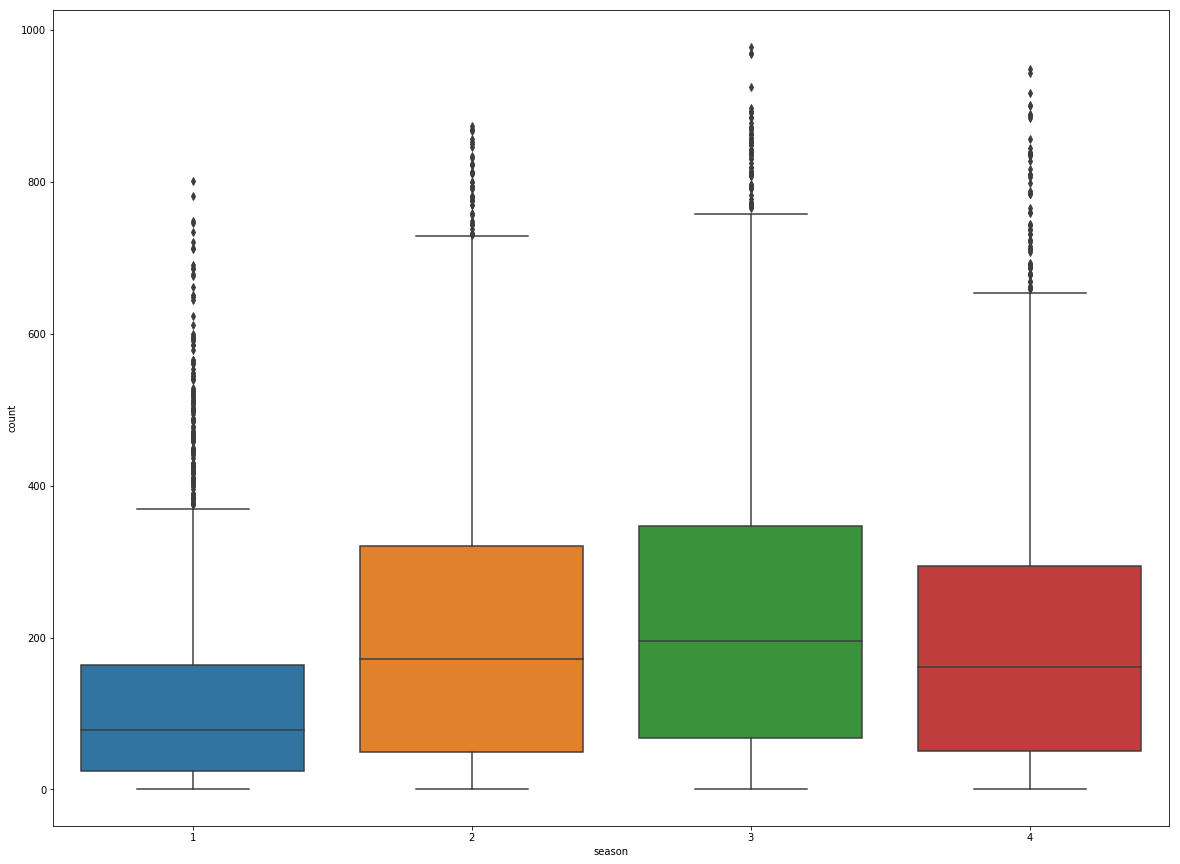

In [12]:
plt.figure(figsize=(20,15))
sns.boxplot('season','count', data=df)

In [13]:
df.groupby('season').count()['count'].iplot(
    yTitle='Rental Count',
    xTitle='Year',
    title='Property Type Wise Loan Count',
    colors='Red',
    mode='lines+markers')

In [14]:
df.groupby('season').max()['casual'].iplot(
    yTitle='Number of Casual  Bikers',
    xTitle='Year',
    title='Property Type Wise Loan Count',
    colors='Red',
    mode='lines+markers')

In [15]:
df.groupby('season').max()['registered'].iplot(
    yTitle='Rental Count',
    xTitle='Year',
    title='Year Type Rental Count',
    colors='Red',
    mode='lines+markers')

In [16]:
df.groupby('season').max()[['registered','casual']].iplot(
    yTitle='Number of Casual VS Registered Bikers',
    xTitle='Year',
    title='Year Wise Casual VS Registered Bikers',
    mode='lines+markers')

In [17]:
df.groupby('season').max()['windspeed'].iplot(
    yTitle='Rental Count',
    xTitle='Year',
    title='Property Type Wise Loan Count',
    colors='Red',
    mode='lines+markers')

In [18]:
df['datetime'] = pd.to_datetime(df.datetime)

In [19]:
df['month'] = df['datetime'].dt.month
df['quarter'] = df['datetime'].dt.quarter
df['weekNumberInYear'] = df['datetime'].dt.week
df['dayOfMonth'] = df['datetime'].dt.day
df['dayInWeek'] = df['datetime'].dt.dayofweek.apply(lambda x : cal.day_name[x])
df['hourOfDay'] = df['datetime'].dt.hour

In [20]:
df.head(3).transpose()

0                    1  \
datetime          2011-01-01 00:00:00  2011-01-01 01:00:00   
season                              1                    1   
holiday                             0                    0   
workingday                          0                    0   
weather                             1                    1   
temp                             9.84                 9.02   
atemp                          14.395               13.635   
humidity                           81                   80   
windspeed                           0                    0   
casual                              3                    8   
registered                         13                   32   
count                              16                   40   
month                               1                    1   
quarter                             1                    1   
weekNumberInYear                   52                   52   
dayOfMonth                          1                    1   
dayInWeek                    Saturday             Saturday   
hourOfDay                           0                    1   

                                    2  
datetime          2011-01-01 02:00:00  
season                              1  
holiday                             0  
workingday                          0  
weather                             1  
temp                             9.02  
atemp                          13.635  
humidity                           80  
windspeed                           0  
casual                              5  
registered                         27  
count                              32  
month                               1  
quarter                             1  
weekNumberInYear                   52  
dayOfMonth                          1  
dayInWeek                    Saturday  
hourOfDay                           2

In [21]:
df.corr()

season   holiday  workingday   weather      temp  \
season            1.000000  0.029368   -0.008126  0.008879  0.258689   
holiday           0.029368  1.000000   -0.250491 -0.007074  0.000295   
workingday       -0.008126 -0.250491    1.000000  0.033772  0.029966   
weather           0.008879 -0.007074    0.033772  1.000000 -0.055035   
temp              0.258689  0.000295    0.029966 -0.055035  1.000000   
atemp             0.264744 -0.005215    0.024660 -0.055376  0.984948   
humidity          0.190610  0.001929   -0.010880  0.406244 -0.064949   
windspeed        -0.147121  0.008409    0.013373  0.007261 -0.017852   
casual            0.096758  0.043799   -0.319111 -0.135918  0.467097   
registered        0.164011 -0.020956    0.119460 -0.109340  0.318571   
count             0.163439 -0.005393    0.011594 -0.128655  0.394454   
month             0.971524  0.001731   -0.003394  0.012144  0.257589   
quarter           1.000000  0.029368   -0.008126  0.008879  0.258689   
weekNumberInYear  0.939284  0.000976   -0.022593  0.019762  0.240794   
dayOfMonth        0.001729 -0.015877    0.009829 -0.007890  0.015551   
hourOfDay        -0.006546 -0.000354    0.002780 -0.022740  0.145430   

                     atemp  humidity  windspeed    casual  registered  \
season            0.264744  0.190610  -0.147121  0.096758    0.164011   
holiday          -0.005215  0.001929   0.008409  0.043799   -0.020956   
workingday        0.024660 -0.010880   0.013373 -0.319111    0.119460   
weather          -0.055376  0.406244   0.007261 -0.135918   -0.109340   
temp              0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp             1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity         -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed        -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual            0.462067 -0.348187   0.092276  1.000000    0.497250   
registered        0.314635 -0.265458   0.091052  0.497250    1.000000   
count             0.389784 -0.317371   0.101369  0.690414    0.970948   
month             0.264173  0.204537  -0.150192  0.092722    0.169451   
quarter           0.264744  0.190610  -0.147121  0.096758    0.164011   
weekNumberInYear  0.248653  0.216435  -0.145962  0.079906    0.156480   
dayOfMonth        0.011866 -0.011335   0.036157  0.014109    0.019111   
hourOfDay         0.140343 -0.278011   0.146631  0.302045    0.380540   

                     count     month   quarter  weekNumberInYear  dayOfMonth  \
season            0.163439  0.971524  1.000000          0.939284    0.001729   
holiday          -0.005393  0.001731  0.029368          0.000976   -0.015877   
workingday        0.011594 -0.003394 -0.008126         -0.022593    0.009829   
weather          -0.128655  0.012144  0.008879          0.019762   -0.007890   
temp              0.394454  0.257589  0.258689          0.240794    0.015551   
atemp             0.389784  0.264173  0.264744          0.248653    0.011866   
humidity         -0.317371  0.204537  0.190610          0.216435   -0.011335   
windspeed         0.101369 -0.150192 -0.147121         -0.145962    0.036157   
casual            0.690414  0.092722  0.096758          0.079906    0.014109   
registered        0.970948  0.169451  0.164011          0.156480    0.019111   
count             1.000000  0.166862  0.163439          0.152512    0.019826   
month             0.166862  1.000000  0.971524          0.961809    0.001974   
quarter           0.163439  0.971524  1.000000          0.939284    0.001729   
weekNumberInYear  0.152512  0.961809  0.939284          1.000000    0.018538   
dayOfMonth        0.019826  0.001974  0.001729          0.018538    1.000000   
hourOfDay         0.400601 -0.006818 -0.006546         -0.006532    0.001132   

                  hourOfDay  
season            -0.006546  
holiday           -0.000354  
workingday         0.002780  
weather           -0.022740  
temp               0.145430  
atemp       

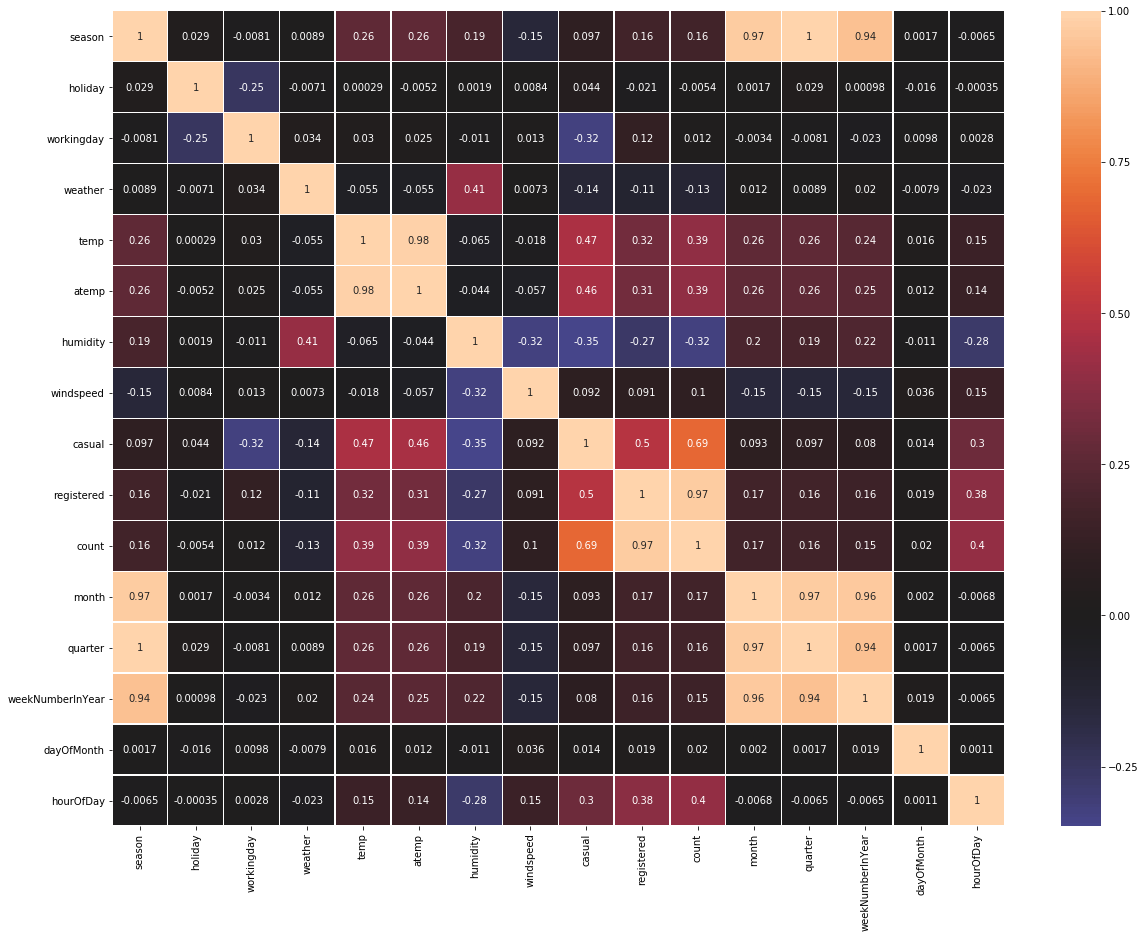

In [22]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, center=0)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
datetime            10886 non-null datetime64[ns]
season              10886 non-null int64
holiday             10886 non-null int64
workingday          10886 non-null int64
weather             10886 non-null int64
temp                10886 non-null float64
atemp               10886 non-null float64
humidity            10886 non-null int64
windspeed           10886 non-null float64
casual              10886 non-null int64
registered          10886 non-null int64
count               10886 non-null int64
month               10886 non-null int64
quarter             10886 non-null int64
weekNumberInYear    10886 non-null int64
dayOfMonth          10886 non-null int64
dayInWeek           10886 non-null object
hourOfDay           10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(13), object(1)
memory usage: 1.5+ MB
